In [198]:
from cleaned import ratings_df, df
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy 

"""
____ Var vs My Ratings:
Runtime, 
IMDb Rating, 
Year, 
Num votes, 
Day Rated, 
Genre, 
Title Type!
"""
#* Just for reference so I can see the column names!
X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated',
             'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
             'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
             'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western',
             'movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']]
y = ratings_df['Your Rating']


count    1068.000000
mean      108.973783
std        27.829499
min        11.000000
25%        96.000000
50%       109.000000
75%       124.000000
max       242.000000
Name: Runtime (mins), dtype: float64
1068


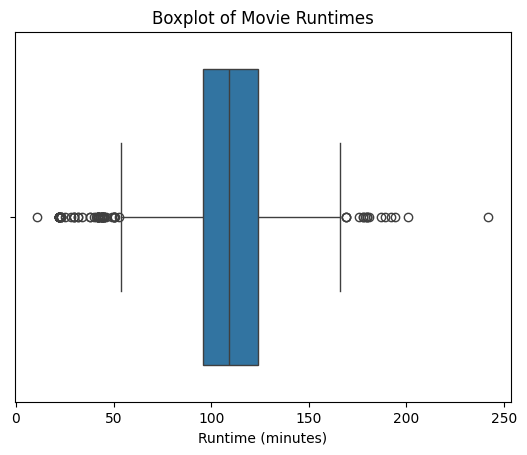

In [199]:

#! Runtime (mins)
print(ratings_df["Runtime (mins)"].describe())
print(len(ratings_df)) #* Outlier alert of max and 3 missing values ^ 

#* Shows representation of outliers..
sns.boxplot(x=ratings_df['Runtime (mins)'])
plt.title('Boxplot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()


#todo: When I come back to this!! This orginal plot was showing outliers now chained assignment is stuffing up!

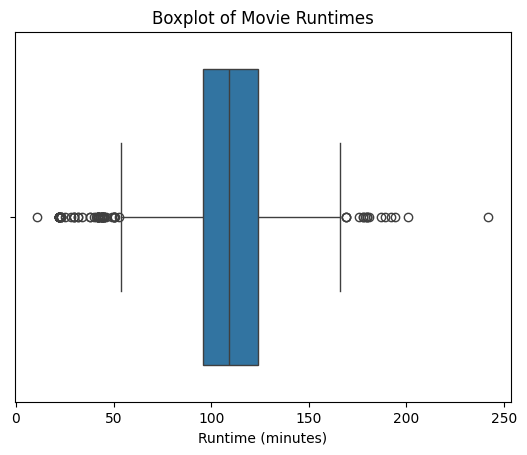

count    1068.000000
mean      108.973783
std        27.829499
min        11.000000
25%        96.000000
50%       109.000000
75%       124.000000
max       242.000000
Name: Runtime (mins), dtype: float64


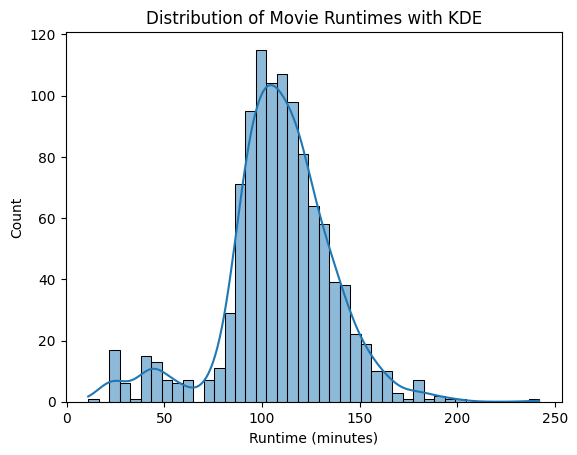

In [200]:
# Runtime (mins) - for TvShows is done by episode but some have been classified wrong so to keep it fair will change -------- REword this..
#? Using the rule that a movie should not be more than 4 hours anything that is longer needs to be altered to episode runtime (mins) to ensure its fair
#? Rather than removing these points!
filtered_df = ratings_df[ratings_df["Runtime (mins)"] > 240]
# print(filtered_df.Title)
"""
4                      The Queen's Gambit
10                                Hawkeye
58                                Friends
161          Zack Snyder's Justice League
247                               Beckham
828                 How I Met Your Mother
883     Gilmore Girls: A Year in the Life
932                         Sex Education
980                        The Last Dance
983                        Obi-Wan Kenobi
1013                         Breaking Bad
1019                                 Loki
1020                          WandaVision
1022    The Falcon and the Winter Soldier
1039                      Game of Thrones
1052                         The Stranger"""
sample_numbers = [4, 10, 58, 247, 828, 883, 932, 980, 983, 1013, 1019, 1020, 1022, 1039, 1052]
correct_runtimes = [54, 42, 23, 49, 23, 44, 46, 42, 38, 44, 34, 28, 32, 56, 41] # Googled These 

modified_df = copy.deepcopy(ratings_df) #todo This still hasn't work quick check Why and then don't bother...
modified_df.loc[sample_numbers, "Runtime (mins)"] = correct_runtimes

sns.boxplot(x=modified_df['Runtime (mins)'])
plt.title('Boxplot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()

print(modified_df["Runtime (mins)"].describe()) #! I didn't realise this was static coding and would affect data above?

#! This graph do be pretty lit..
sns.histplot(ratings_df['Runtime (mins)'], kde=True)
plt.title('Distribution of Movie Runtimes with KDE')
plt.xlabel('Runtime (minutes)')
plt.show()

count    1068.000000
mean        6.884176
std         0.964915
min         1.700000
25%         6.300000
50%         6.900000
75%         7.600000
max         9.500000
Name: IMDb Rating, dtype: float64


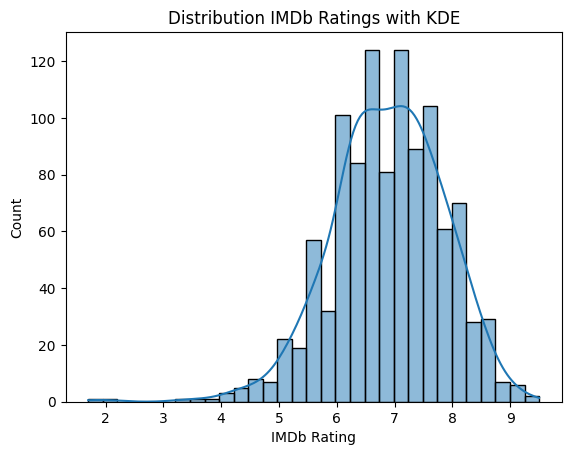

In [201]:

#! IMDb Rating
print(ratings_df["IMDb Rating"].describe())

sns.histplot(ratings_df['IMDb Rating'], kde=True)
plt.title('Distribution IMDb Ratings with KDE')
plt.xlabel('IMDb Rating')
plt.show()

#todo Let's see if we can compare my ratings in there as well?

count    1068.000000
mean     2010.022472
std         8.143826
min      1963.000000
25%      2006.750000
50%      2012.000000
75%      2015.000000
max      2023.000000
Name: Year, dtype: float64


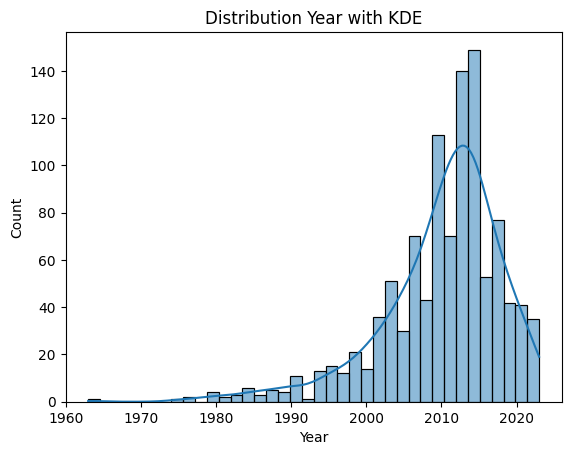

In [202]:

#! Year
print(ratings_df["Year"].describe())

sns.histplot(ratings_df['Year'], kde=True)
plt.title('Distribution Year with KDE')
plt.xlabel('Year')
plt.show()

count    1.068000e+03
mean     3.681557e+05
std      3.644292e+05
min      4.610000e+02
25%      1.282060e+05
50%      2.643440e+05
75%      4.864065e+05
max      2.844938e+06
Name: Num Votes, dtype: float64


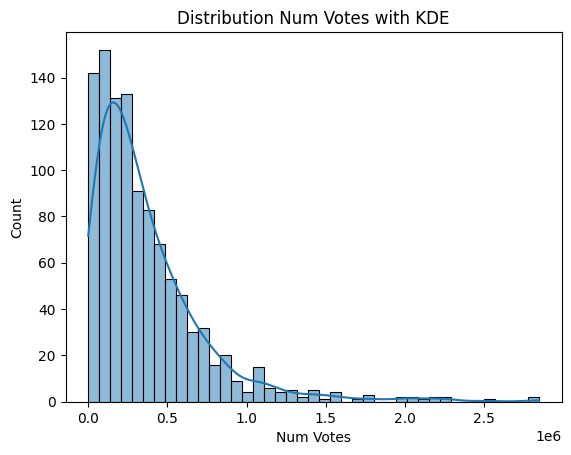

In [203]:

#! Num votes
print(ratings_df["Num Votes"].describe())

sns.histplot(ratings_df['Num Votes'], kde=True)
plt.title('Distribution Num Votes with KDE')
plt.xlabel('Num Votes')
plt.show()

count    1068.000000
mean      980.073970
std      1115.574675
min         0.000000
25%         1.000000
50%       387.000000
75%      2122.000000
max      3481.000000
Name: Day_Rated, dtype: float64


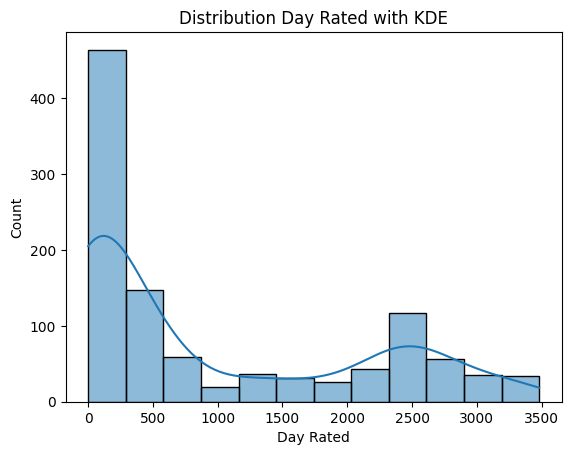

In [204]:

#! Day Rated 
print(ratings_df["Day_Rated"].describe())

sns.histplot(ratings_df['Day_Rated'], kde=True)
plt.title('Distribution Day Rated with KDE')
plt.xlabel('Day Rated')
plt.show()

#? - This distribution can be explained by the fact when I first created the account I had to rate all movies I'd seen from memory, so big clump at the start then changed ..
# Reword that or just delete ^ pretty garbage..

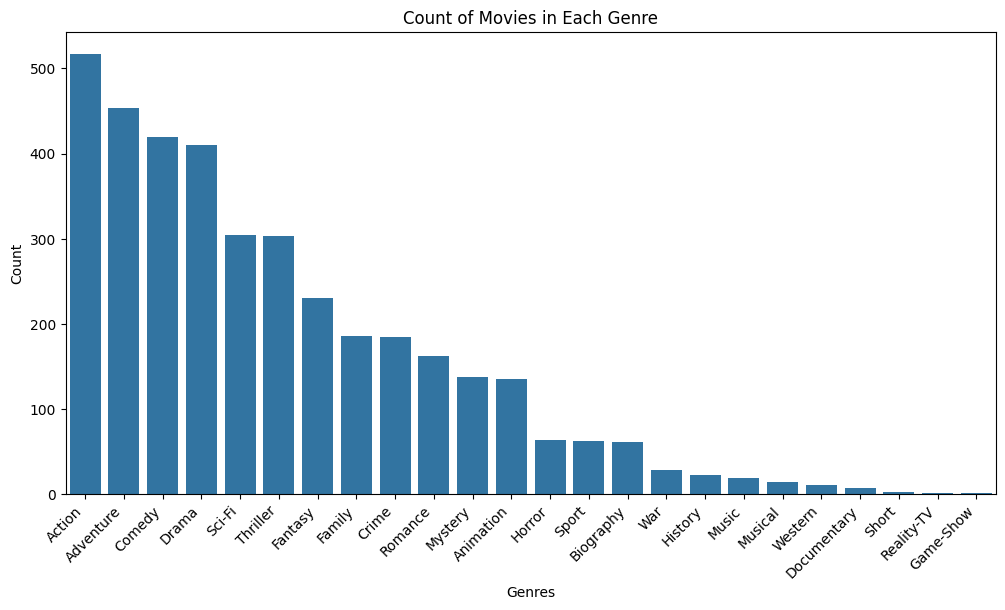

In [205]:

#! Genre
#? Different approach needed for these variables that have been one-hot encoded..
genres_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
                  'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV',
                  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

genre_counts = ratings_df[genres_columns].sum()
genre_counts = genre_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Count of Movies in Each Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

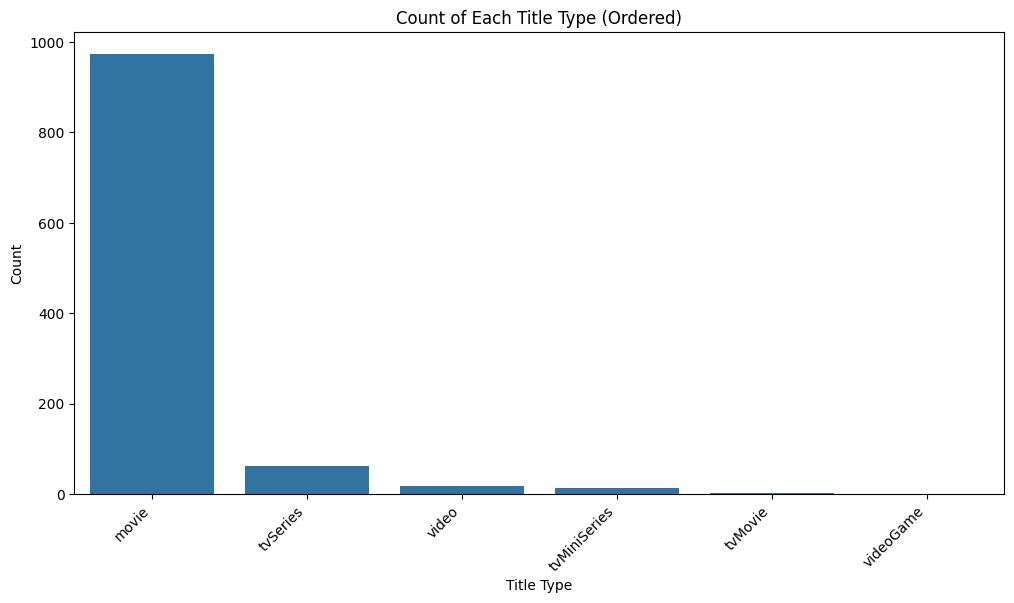

In [206]:

#! Title Type
#? Same as genres (both one-hoh encoded!)
title_type_columns = ['movie', 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video', 'videoGame']

title_type_counts = ratings_df[title_type_columns].sum()
title_type_counts = title_type_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=title_type_counts.index, y=title_type_counts.values)
plt.title('Count of Each Title Type (Ordered)')
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

#? Pretty much only voted movies innit